# Feature detection

## Harris Corner detection

As always we start with the imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

As a start we will use the same checkerboard image as earlier.

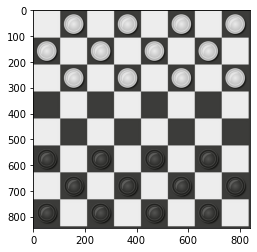

In [2]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [cv2.cornerHarris](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cornerharris). Afterwards we would like to draw the location of the detected corners on the image and display it.

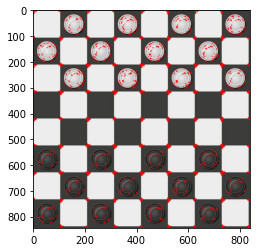

In [48]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
corners = cv2.cornerHarris(gray, 2,3,0.04) 
corners = cv2.erode(corners, None,10)
### Draw the detected corners in the original image here ###
himg = img.copy()
himg[corners>0.01*corners.max()]=[255,0,0]

# Display image
plt.imshow(himg)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV the function is called [cv2.goodFeaturesToTrack](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack). 
Let's start with a different image this time.

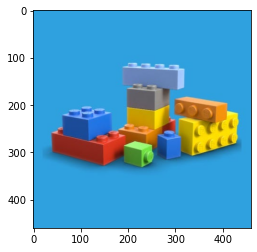

In [49]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

50


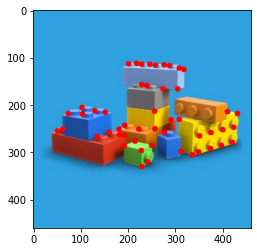

In [60]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert goodFeaturesToTrack detector here ###
feature_points = cv2.goodFeaturesToTrack(gray,50, 0.1, 10)
feature_points = np.float32(feature_points)
### Draw the detected corners in the original image here ###

simg = img.copy()
print(len(feature_points))
for item in feature_points:
    x, y = item[0]
    cv2.circle(simg, (int(x),int(y)), 6, 255, -5)

# Display image
plt. imshow(simg)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

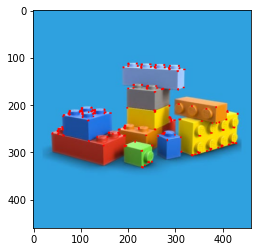

In [65]:

corners = cv2.cornerHarris(gray, 2,3,0.04) 
corners = cv2.dilate(corners, None,1)
### Draw the detected corners in the original image here ###
himg = img.copy()
himg[corners>0.005*corners.max()]=[255,0,0]

# Display image
plt.imshow(himg)